# Model Training


### 1.1 Important Data and Required Packages


##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRFRegressor
import warnings

### Import the CSV Data as Pandas Dataframe


In [2]:
df = pd.read_csv('data/stud.csv')

##### Show first 5 records


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variable


In [4]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [5]:
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

In [ ]:
# StandardScaler: Scales numerical features to have a mean of 0 and a standard deviation of 1
numeric_transformer = StandardScaler()

# OneHotEncoder: Converts categorical features into binary (0s and 1s) columns
one_hot_transformer = OneHotEncoder()

# ColumnTransformer: Combines both transformers to preprocess numerical and categorical features
preprocessor = ColumnTransformer(
    [
        # Apply OneHotEncoder to the categorical features
        ('OneHotEncoder', one_hot_transformer, categorical_features),

        # Apply StandardScaler to the numerical features
        ('StandardScaler', numeric_transformer, numerical_features),
    ]
)

# The 'preprocessor' object now transforms the input dataset as follows:
# - Categorical features will be converted into binary columns (one-hot encoding)
# - Numerical features will be standardized (scaled) for consistency
#
# This makes the input ready to feed into a machine learning model,
# ensuring that both feature types are preprocessed correctly and efficiently.

In [7]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(800, 19)
(200, 19)
(800,)
(200,)


#### Create a Function to Evaluate and give all metrics after model Training


In [12]:
def evaluate_model(y_true, y_pred):
    """
    Evaluate the performance of a regression model.

    Parameters:
    - y_true (array-like): The true target values.
    - y_pred (array-like): The predicted target values from the model.

    Returns:
    - dict: A dictionary containing:
        - 'MAE': Mean Absolute Error
        - 'RMSE': Root Mean Squared Error
        - 'R2': R-squared (coefficient of determination)
    
    """
    # Calculate regression evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # R-squared score
    
    # Return metrics as a dictionary for better usability
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }


In [13]:
# Dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "XGBRF Regressor": XGBRFRegressor()
}


In [15]:
results = {}

# Loop through all models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions for train and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_metrics = evaluate_model(y_train, train_pred)
    test_metrics = evaluate_model(y_test, test_pred)
    
    # Store the results using string keys
    results[model_name] = {
        "Train": {"MAE": train_metrics['MAE'], "RMSE": train_metrics['RMSE'], "R2": train_metrics['R2']},
        "Test": {"MAE": test_metrics['MAE'], "RMSE": test_metrics['RMSE'], "R2": test_metrics['R2']},
    }

# Print Results for Train and Test
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Train - MAE: {metrics['Train']['MAE']:.3f}, RMSE: {metrics['Train']['RMSE']:.3f}, R2: {metrics['Train']['R2']:.3f}")
    print(f"  Test  - MAE: {metrics['Test']['MAE']:.3f}, RMSE: {metrics['Test']['RMSE']:.3f}, R2: {metrics['Test']['R2']:.3f}")
    print("-" * 60)


Model: Linear Regression
  Train - MAE: 4.267, RMSE: 5.323, R2: 0.874
  Test  - MAE: 4.215, RMSE: 5.394, R2: 0.880
------------------------------------------------------------
Model: Ridge Regression
  Train - MAE: 4.265, RMSE: 5.323, R2: 0.874
  Test  - MAE: 4.211, RMSE: 5.390, R2: 0.881
------------------------------------------------------------
Model: Lasso Regression
  Train - MAE: 5.206, RMSE: 6.594, R2: 0.807
  Test  - MAE: 5.158, RMSE: 6.520, R2: 0.825
------------------------------------------------------------
Model: K-Nearest Neighbors
  Train - MAE: 4.517, RMSE: 5.708, R2: 0.855
  Test  - MAE: 5.621, RMSE: 7.253, R2: 0.784
------------------------------------------------------------
Model: Decision Tree
  Train - MAE: 0.019, RMSE: 0.280, R2: 1.000
  Test  - MAE: 6.150, RMSE: 7.772, R2: 0.752
------------------------------------------------------------
Model: Random Forest
  Train - MAE: 1.817, RMSE: 2.280, R2: 0.977
  Test  - MAE: 4.637, RMSE: 6.020, R2: 0.851
-------------

# Interpretation

### Key Metrics Recap

- **MAE (Mean Absolute Error):** Average magnitude of the errors (absolute). Lower values mean better performance.
- **RMSE (Root Mean Squared Error):** Average magnitude of squared errors. More sensitive to large errors than MAE. Lower is better.
- **R² (R-Squared):** Proportion of variance in the target variable explained by the model.
  - **1.0** is a perfect model, closer to **1** is better.
  - A **negative R²** indicates worse than a baseline.

---

### 1. Linear Regression

- **Train:** MAE = 4.267, RMSE = 5.323, R² = 0.874
- **Test:** MAE = 4.215, RMSE = 5.394, R² = 0.880  
  **Interpretation:** Linear Regression generalizes well since train and test metrics are similar. R² shows it explains ~87-88% of the target’s variance. Slightly higher RMSE than MAE suggests no extreme large errors.

---

### 2. Ridge Regression

- **Train:** MAE = 4.265, RMSE = 5.323, R² = 0.874
- **Test:** MAE = 4.211, RMSE = 5.390, R² = 0.881  
  **Interpretation:** Ridge (L2 regularization) is almost identical to Linear Regression. This suggests overfitting is not a major issue for this dataset, so Ridge's regularization didn't make a big impact.

---

### 3. Lasso Regression

- **Train:** MAE = 5.206, RMSE = 6.594, R² = 0.807
- **Test:** MAE = 5.158, RMSE = 6.520, R² = 0.825  
  **Interpretation:** Lasso Regression (L1 regularization) has slightly worse metrics compared to Ridge and Linear Regression. Its RMSE and MAE are higher, and R² dropped to ~80-82%. Lasso might have removed some features or shrunk coefficients that were useful.

---

### 4. K-Nearest Neighbors (KNN)

- **Train:** MAE = 4.517, RMSE = 5.708, R² = 0.855
- **Test:** MAE = 5.621, RMSE = 7.253, R² = 0.784  
  **Interpretation:** KNN performed decently but overfitted slightly as seen from higher Test error metrics (5.6 MAE, 7.25 RMSE). The performance drop in R² (0.78 Test vs 0.85 Train) indicates this.

---

### 5. Decision Tree

- **Train:** MAE = 0.019, RMSE = 0.280, R² = 1.000
- **Test:** MAE = 6.150, RMSE = 7.772, R² = 0.752  
  **Interpretation:** The **train metrics** are a clear sign of **overfitting**—the Decision Tree has completely memorized the training data with perfect performance. However, on Test data, errors are much higher (R² = 0.75), meaning it generalizes poorly.

---

### 6. Random Forest

- **Train:** MAE = 1.817, RMSE = 2.280, R² = 0.977
- **Test:** MAE = 4.637, RMSE = 6.020, R² = 0.851  
  **Interpretation:** Random Forest performs well, with R² ~85% on Test data and slightly better metrics than the Decision Tree. While overfitting exists (better performance on Train), it's significantly reduced compared to the single Decision Tree.

---

### 7. AdaBoost

- **Train:** MAE = 4.792, RMSE = 5.869, R² = 0.847
- **Test:** MAE = 4.713, RMSE = 6.048, R² = 0.850  
  **Interpretation:** AdaBoost performs **very well**, generalizing almost identically for Train and Test. The R² values ~84-85% indicate a robust model.

---

### 8. Support Vector Regressor (SVR)

- **Train:** MAE = 4.869, RMSE = 6.577, R² = 0.808
- **Test:** MAE = 5.402, RMSE = 8.127, R² = 0.729  
  **Interpretation:** SVR performs **worse** than most models here. The error is higher on both Train and Test, and R² drops below 73% on Test, indicating limited explanatory power and poorer generalization.

---

### 9. XGBRF Regressor (XGBoost with Random Forest)

- **Train:** MAE = 3.785, RMSE = 4.718, R² = 0.901
- **Test:** MAE = 4.508, RMSE = 5.747, R² = 0.864  
  **Interpretation:** XGBRF is among the top-performing models. It strikes a good balance between performance on Train and Test data with only slight overfitting. The R² = ~86% for Test is excellent, and errors remain low.

---

### Key Takeaways:

1. **Linear Regression, Ridge, and Random Forest** perform best for Test data. Their metrics are competitive and show minimal overfitting.
2. **Decision Tree** severely overfits the Train data.
3. **XGBRF** provides excellent generalization, performing on par with the best models.
4. **SVR** struggles compared to other models.
5. **Lasso Regression** underperforms, likely due to overly aggressive feature selection.
6. **KNN** overfits slightly but still performs decently.

---


### Results


In [17]:
# Initialize lists to store results
model_names = []
train_mae = []
train_rmse = []
train_r2 = []
test_mae = []
test_rmse = []
test_r2 = []

# Loop through results dictionary and populate lists
for model_name, metrics in results.items():
    model_names.append(model_name)
    train_mae.append(metrics['Train']['MAE'])
    train_rmse.append(metrics['Train']['RMSE'])
    train_r2.append(metrics['Train']['R2'])
    test_mae.append(metrics['Test']['MAE'])
    test_rmse.append(metrics['Test']['RMSE'])
    test_r2.append(metrics['Test']['R2'])

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Model Name': model_names,
    'Train MAE': train_mae,
    'Train RMSE': train_rmse,
    'Train R²': train_r2,
    'Test MAE': test_mae,
    'Test RMSE': test_rmse,
    'Test R²': test_r2
})

# Sort the DataFrame by Test R² in descending order
sorted_metrics_df = metrics_df.sort_values(by=['Test R²'], ascending=False)

# Display the sorted DataFrame
sorted_metrics_df


,Model Name,Train MAE,Train RMSE,Train R²,Test MAE,Test RMSE,Test R²
1,Ridge Regression,4.264988,5.323325,0.874304,4.211101,5.390387,0.880593
0,Linear Regression,4.266712,5.323051,0.874317,4.214763,5.393994,0.880433
8,XGBRF Regressor,3.784855,4.718074,0.901262,4.507525,5.747154,0.864264
5,Random Forest,1.816708,2.279750,0.976947,4.637315,6.020060,0.851067
6,AdaBoost,4.791813,5.869128,0.847208,4.712728,6.048001,0.849681
2,Lasso Regression,5.206303,6.593816,0.807146,5.157882,6.519695,0.825320
3,K-Nearest Neighbors,4.516750,5.707885,0.855488,5.621000,7.253041,0.783813
4,Decision Tree,0.018750,0.279508,0.999653,6.150000,7.772387,0.751745
7,Support Vector Regressor (SVR),4.869189,6.577007,0.808128,5.401539,8.126623,0.728600


#### Ridge Regression


In [18]:
# Create and fit the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Get predicted values for the test set
y_test_pred = ridge_model.predict(X_test)

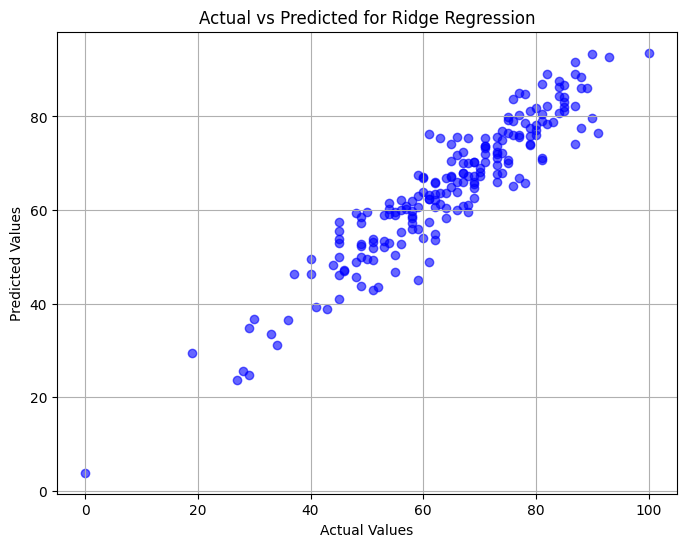

In [19]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.title('Actual vs Predicted for Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

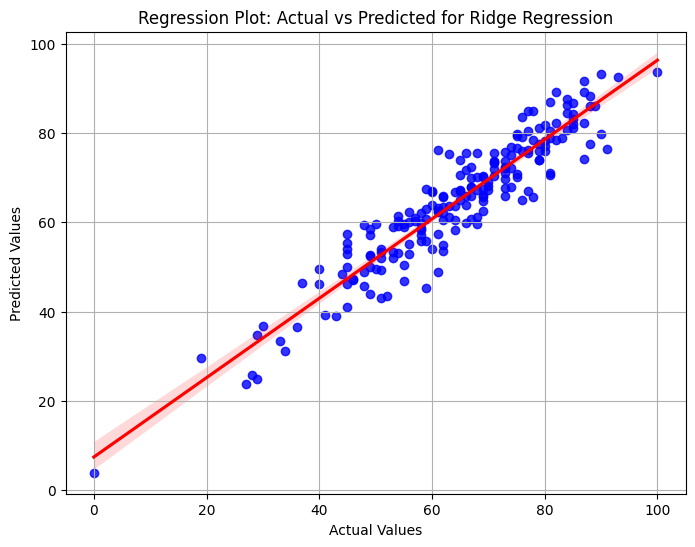

In [20]:
# Regression plot (sns.regplot)
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot: Actual vs Predicted for Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#### Difference between Actual and Predicted Values


In [21]:
# Create a DataFrame of actual, predicted, and difference
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Difference': y_test - y_test_pred
})

In [22]:
results_df.head()

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
